## Multiple Linear Regression

Now you know how to build a model with one X (feature variable) and Y (response variable). But what if you have three feature variables, or may be 10 or 100? Building a separate model for each of them, combining them, and then understanding them will be a very difficult and next to impossible task. By using multiple linear regression, you can build models between a response variable and many feature variables.

Let's see how to do that.

### Step_1 : Importing and Understanding Data

In [1]:
import pandas as pd

In [4]:
# Importing advertising.csv
advertising_multi = pd.read_csv(r'advertising.csv')

In [5]:
# Looking at the first five rows
advertising_multi.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
#y =b0+b1x1+b2x2

In [6]:
advertising_multi.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
advertising_multi.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
advertising_multi.shape

(200, 4)

In [9]:
# Looking at the last five rows
advertising_multi.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [10]:
# What type of values are stored in the columns?
advertising_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([ 2.,  9., 20., 47., 35., 29., 22., 17., 12.,  7.]),
 array([ 1.6 ,  4.14,  6.68,  9.22, 11.76, 14.3 , 16.84, 19.38, 21.92,
        24.46, 27.  ]),
 <BarContainer object of 10 artists>)

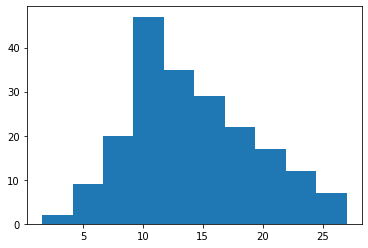

In [12]:
plt.hist(advertising_multi.Sales)

C:\Users\Priyanka\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

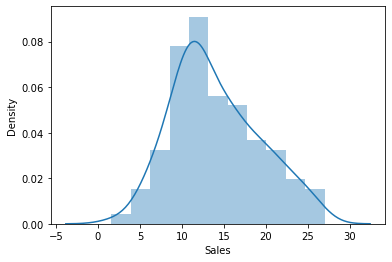

In [13]:
sns.distplot(advertising_multi.Sales)

In [14]:
advertising_multi.Sales.skew()

0.4075714250767127

C:\Users\Priyanka\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TV', ylabel='Density'>

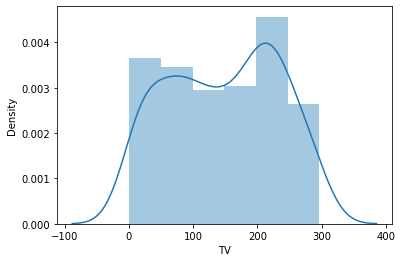

In [15]:
sns.distplot(advertising_multi.TV)

C:\Users\Priyanka\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Radio', ylabel='Density'>

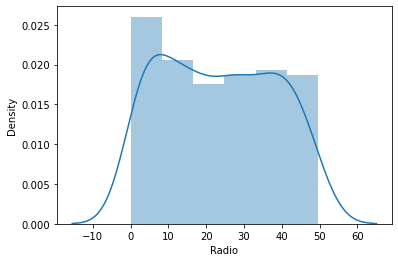

In [16]:
sns.distplot(advertising_multi.Radio)

C:\Users\Priyanka\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

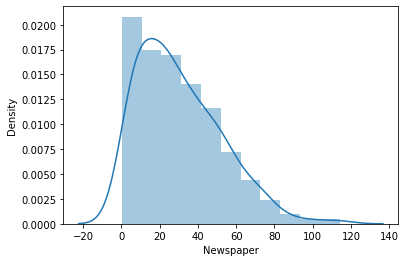

In [17]:
sns.distplot(advertising_multi.Newspaper)

In [ ]:
# Let's look at some statistical information about our dataframe.
advertising_multi.describe()

### Step_2: Visualising Data

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

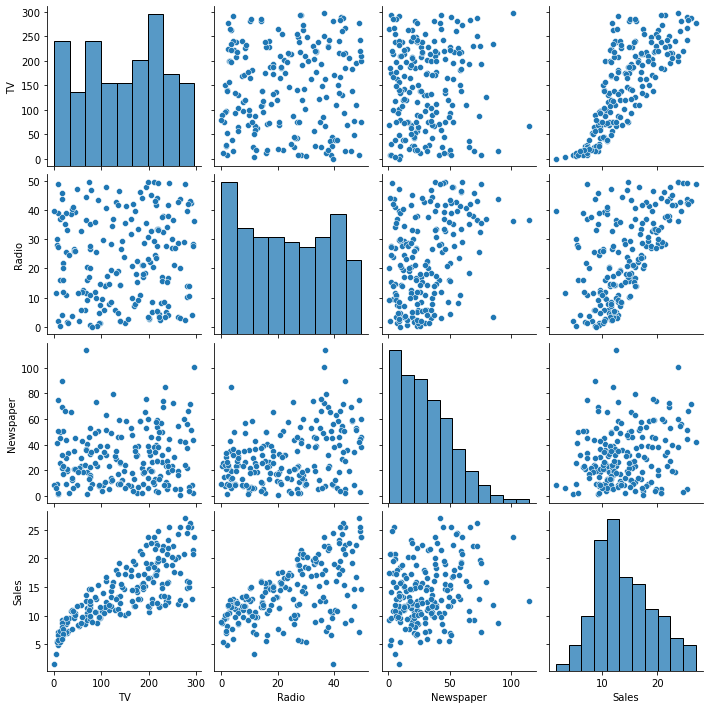

In [19]:
# Let's plot a pair plot of all variables in our dataframe
sns.pairplot(advertising_multi)

C:\Users\Priyanka\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


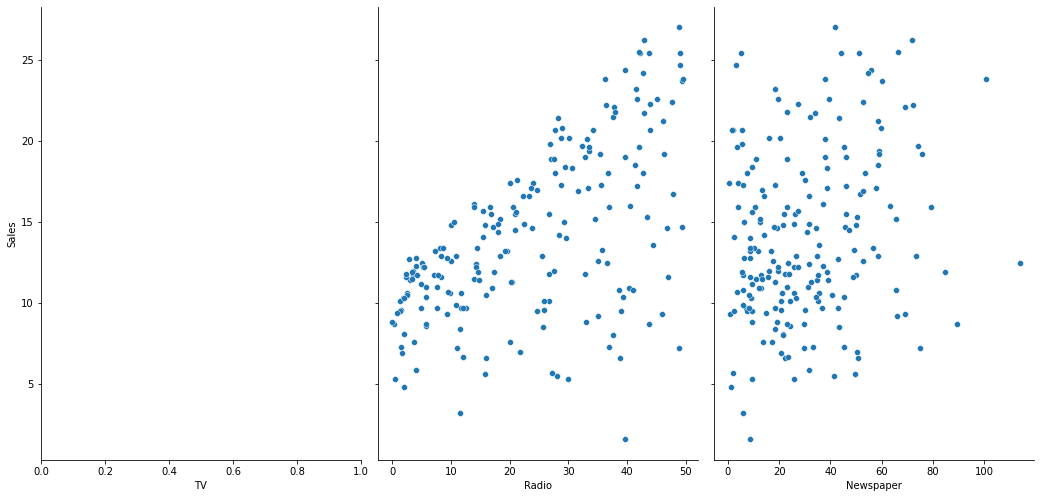

In [20]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(advertising_multi, x_vars=['TV','Radio','Newspaper'], y_vars='Sales',size=7, aspect=0.7, kind='scatter')

In [ ]:
plt.scatter(advertising_multi.Newspaper,advertising_multi.Sales)

### Step_3: Splitting the Data for Training and Testing

In [22]:
# Putting feature variable to X
X = advertising_multi[['TV','Radio','Newspaper']]

# Putting response variable to y
y = advertising_multi['Sales']

In [23]:
advertising_multi.shape

(200, 4)

In [24]:
#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)

In [25]:
X_train.shape

(140, 3)

In [26]:
y_train.shape

(140,)

In [27]:
X_test.shape

(60, 3)

In [28]:
y_test.shape

(60,)

### Step_4 : Performing Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB

In [31]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

In [32]:
# fit the model to the training data
lm.fit(X_train,y_train)

LinearRegression()

### Step_5 : Model Evaluation

In [33]:
# print the intercept
print(lm.intercept_)

2.652789668879498


In [ ]:
y=b0+b1x1+b2x2+b3x3

In [ ]:
y=2.65+0.04*TV+0.189*Radio+0.0046*Newspaper

In [34]:
# Let's see the coefficient
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045426
Radio,0.189758
Newspaper,0.004603


In [37]:
X_train.head()

,TV,Radio,Newspaper
74,213.4,24.6,13.1
3,151.5,41.3,58.5
185,205.0,45.1,19.6
26,142.9,29.3,12.6
90,134.3,4.9,9.3


In [40]:
y_train.head()

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: Sales, dtype: float64

From the above result we may infern that if TV price increses by 1 unit it will affect sales by 0.045 units.

### Step_6 : Predictions

In [42]:
# Making predictions using the model
y_pred = lm.predict(X_test)

In [43]:
y_pred

array([10.62160072, 20.00625302, 16.91850882, 19.17040746, 20.94974131,
       13.12284284, 11.80740696, 12.32019766, 20.57806782, 20.95662688,
       10.79096475, 19.54868702,  6.42403866, 15.23133391,  8.97226257,
        7.89897862, 16.23599497, 12.02636477, 17.09702178, 11.26080277,
       16.97826292,  9.75655721, 20.82389762, 17.20916742, 15.13816239,
       21.97290698, 19.20181841, 10.07501899, 19.39017185, 14.8673761 ,
       14.36798893,  7.55604543,  9.96742165, 14.76342565,  7.20995576,
       13.60003295,  7.49088656, 11.70865932, 13.46091883, 15.2229793 ,
       17.18088277, 13.56738329, 14.30942267, 13.72909849, 11.88559349,
        8.77039705, 12.1244102 , 19.20252289,  9.08376601,  5.15367352,
       16.22852749, 18.14111213, 12.94835466, 16.86274503, 17.86462435,
       12.33930625,  4.3575739 , 11.25904494, 16.11560622, 13.56602169])

In [45]:
y_test.head()

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
Name: Sales, dtype: float64

In [ ]:
#y=2.65+0.04*7.8+0.189*38.9+0.0046*50.6

In [ ]:
#y

In [ ]:
X_test

### Step_7: Calculating Error Terms

In [51]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [52]:
import numpy as np

In [53]:
RMSE = np.sqrt(mse)
RMSE

1.3603977338130544

In [54]:
print('Mean_Squared_Error :' ,mse)
print('Mean_Absolute_Error :',mae)
print('r_square_value :',r_squared)

Mean_Squared_Error : 1.8506819941636938
Mean_Absolute_Error : 1.0638483124072016
r_square_value : 0.9058622107532247


### Optional Step : Checking for P-value Using STATSMODELS

In [55]:
import statsmodels.api as sm
X_train_sm = X_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)
# create a fitted model in one line
lm_1 = sm.OLS(y_train,X_train_sm).fit()

# print the coefficients
lm_1.params

const        2.652790
TV           0.045426
Radio        0.189758
Newspaper    0.004603
dtype: float64

In [56]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           9.97e-66
Time:                        10:55:06   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

From the above we can see that Newspaper is insignificant.

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

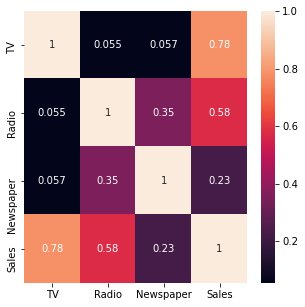

In [58]:
plt.figure(figsize = (5,5))
sns.heatmap(advertising_multi.corr(),annot = True)

### Step_8 : Implementing the results and running the model again

From the data above, you can conclude that Newspaper is insignificant.

In [59]:
# Removing Newspaper from our dataset
X_train_new = X_train[['TV','Radio']]
X_test_new = X_test[['TV','Radio']]

In [60]:
# Model building
lm.fit(X_train_new,y_train)

LinearRegression()

In [62]:
# Making predictions
y_pred_new = lm.predict(X_test_new)

In [63]:
y_pred_new

array([10.56198847, 20.16735504, 16.90186462, 19.07993718, 21.03892699,
       13.13621118, 11.80982028, 12.39007729, 20.59914742, 21.04083466,
       10.88508869, 19.38624121,  6.37517955, 15.33164571,  8.96088175,
        7.95144449, 16.38791571, 11.97017124, 17.24725749, 11.20901475,
       17.11470022,  9.70819803, 20.79788275, 17.20749366, 15.18035107,
       22.18189008, 19.17555656, 10.05518823, 19.5883307 , 14.98424867,
       14.39922454,  7.65095995,  9.84543862, 14.78150095,  7.22855505,
       13.69168479,  7.43358375, 11.75347003, 13.50004784, 15.057806  ,
       17.06957807, 13.68351323, 14.23222825, 13.70744537, 11.96487996,
        8.70898678, 11.90028246, 19.26409026,  9.01348371,  5.17060846,
       16.23196722, 18.16063096, 12.87565806, 16.92691617, 17.99125313,
       12.31004629,  4.29140991, 11.39172539, 16.20134352, 13.51229884])

In [64]:
from sklearn.metrics import r2_score

In [65]:
r2_score(y_pred_new,y_test)

0.9059608444794007

Text(0, 0.5, 'Sales')

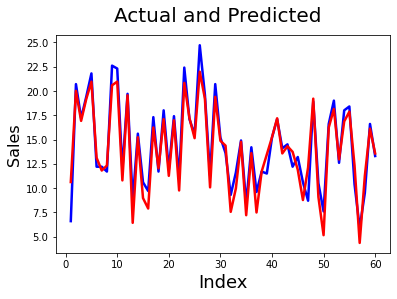

In [66]:
#Actual vs Predicted
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                               # Y-label

Text(0, 0.5, 'ytest-ypred')

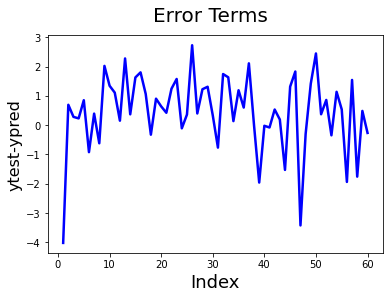

In [67]:
# Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

C:\Users\Priyanka\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Index')

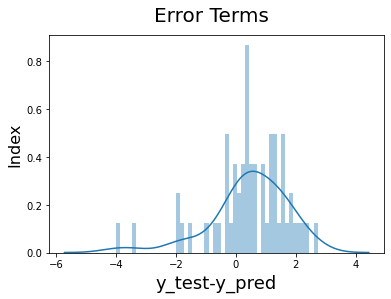

In [68]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

In [69]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
mse = mean_squared_error(y_test, y_pred_new)
mae = mean_absolute_error(y_test, y_pred_new)
r_squared = r2_score(y_test, y_pred_new)

In [70]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)
print('Mean Absolute Error:', mae)

Mean_Squared_Error : 1.7847400520902816
r_square_value : 0.9092164491718219
Mean Absolute Error: 1.0397500099187904


In [71]:
X_train_final = X_train_new
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_final = sm.add_constant(X_train_final)
# create a fitted model in one line
lm_final = sm.OLS(y_train,X_train_final).fit()

print(lm_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           4.46e-67
Time:                        11:00:17   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.0